In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from keras.utils import np_utils
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Read in the data and eliminate any rows with all zeros
df = pd.read_pickle("data.pkl")
df = df[(df.inside_eye > 0) & (df.outside_eye > 0) &(df.jaw > 0) & (df.temple > 0) & (df.vert_nose > 0)]
first_let = df['type'].str[0]

2       E
5       E
7       E
8       E
11      E
       ..
2114    E
2115    E
2116    E
2117    E
2118    E
Name: type, Length: 1517, dtype: object

In [12]:
#Convert the first letter into a binary number
first_let_bin = [1 if let == 'E' else 0 for let in first_let]
df['first_letter'] = first_let_bin
df.head()

In [88]:
# The data is unbalanced. Adding copies to account for that
df_let = df.drop('type', axis=1)
df_let
df_let[df_let.first_letter == 0].shape[0]
df2 = df_let[df_let.first_letter == 0].head(177)
df_let = df_let.append(df2, ignore_index=True)

670

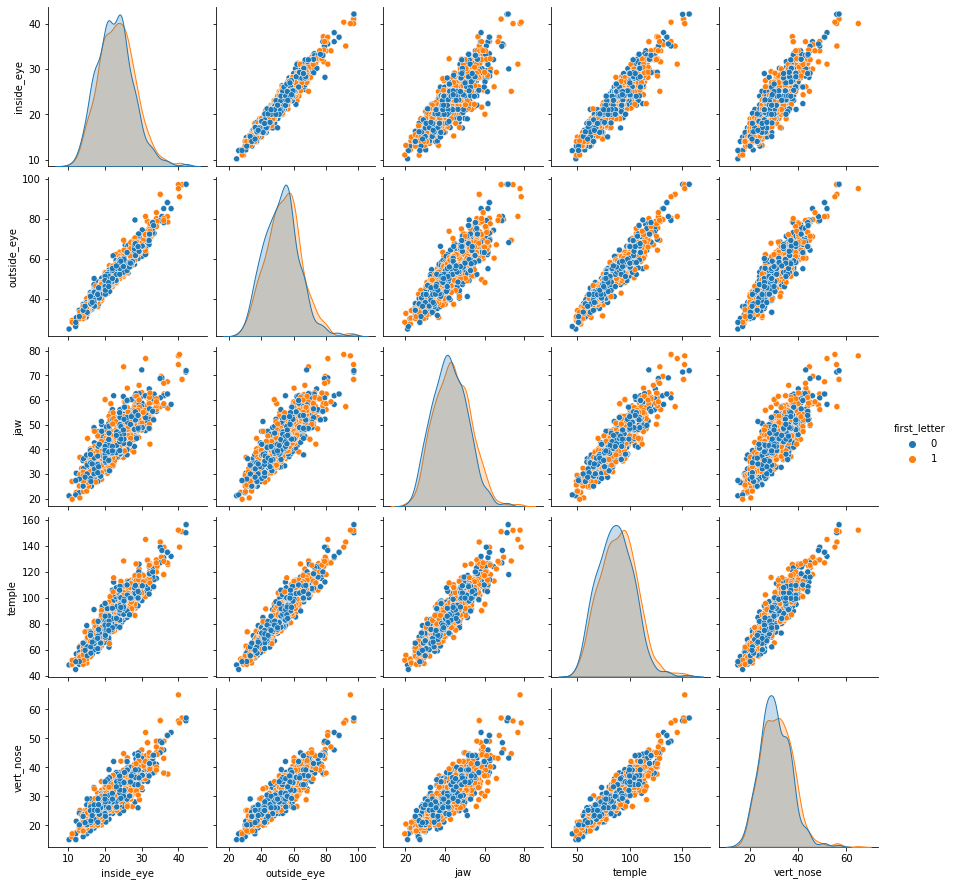

In [126]:
# Show me the correlations
sns.pairplot(df_let, hue='first_letter')

In [98]:
# Split the data
from sklearn.model_selection import train_test_split
X = df[['inside_eye', 'outside_eye', 'jaw', 'temple', 'vert_nose']]
sc = StandardScaler()
X = sc.fit_transform(X)
y = df['first_letter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [125]:
# Building the model
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=5))
#Second  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
model = classifier.fit(X_train,y_train, batch_size=5, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
243/243 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5598 - val_loss: 0.6893 - val_accuracy: 0.5461
Epoch 2/50
243/243 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5614 - val_loss: 0.6841 - val_accuracy: 0.5461
Epoch 3/50
243/243 [==============================] - 0s 980us/step - loss: 0.6851 - accuracy: 0.5614 - val_loss: 0.6815 - val_accuracy: 0.5461
Epoch 4/50
243/243 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5614 - val_loss: 0.6814 - val_accuracy: 0.5461
Epoch 5/50
243/243 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5614 - val_loss: 0.6810 - val_accuracy: 0.5461
Epoch 6/50
243/243 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5614 - val_loss: 0.6809 - val_accuracy: 0.5461
Epoch 7/50
243/243 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5614 - val_loss: 0.6807 - val_accuracy: 0.5461
Epoc

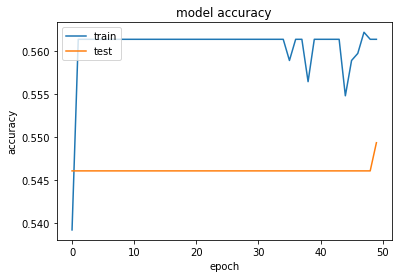

In [118]:
# Plotting the accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

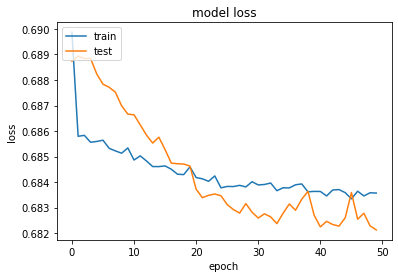

In [119]:
# Plotting the loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
# Let's make predictions on the test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [122]:
# Confusion matric to see how we actually did
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 12 126]
 [ 11 155]]
